# Online Handwritten Datasets

### Table of Contents

1. [UCI - Character Trajectories Data Set](#uci-character)
2. [UCI - UJI Pen Characters (V2) Data Set](#uci-ujipen)
3. [HWRT Database of Handwritten symbols](#hwrt)
4. [ICDAR2013 - Handwriting Stroke Recovery from Offline Data (Kaggle)](#kaggle)
5. [IAM Online Handwriting Database](#IAMonline)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from scipy import misc
from ast import literal_eval

%matplotlib inline

## [UCI - Character Trajectories Data Set](https://archive.ics.uci.edu/ml/datasets/Character+Trajectories ) <a id='uci-character'></a>

* Size: 2,858
* Short description: single stroke trajectories sampled at 200Hz.

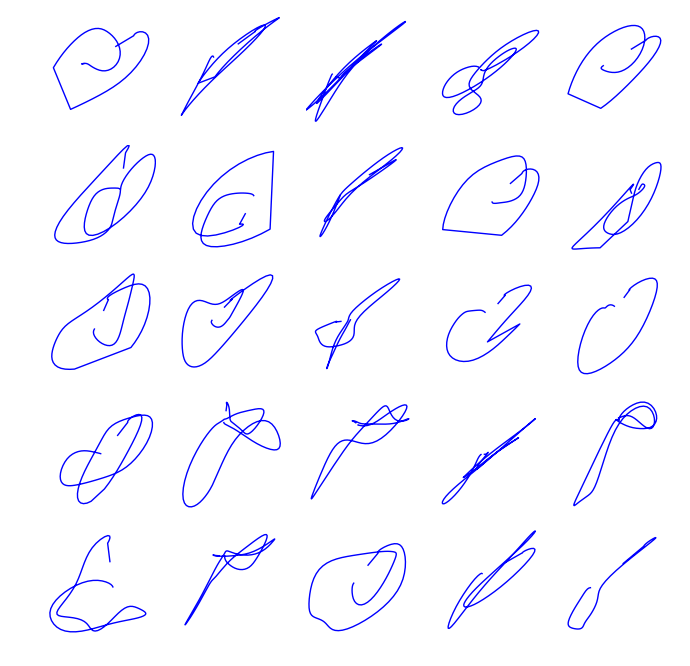

In [2]:
uci_char_path = 'UCI-Character-Trajectories/mixoutALL_shifted.mat'

# Load the data
uci_char = scipy.io.loadmat(uci_char_path)
#print(uci_char.keys()) # ['mixout', '__version__', '__header__', 'consts', '__globals__']
N = uci_char['mixout'].shape[1]
uci_char = uci_char['mixout'][0]

# Get a list of (x,y) for each data
data = []
for ex in uci_char:
    x = [ex[0,i] for i,force_value in enumerate(ex[2]) if force_value != 0.0]
    y = [ex[1,i] for i,force_value in enumerate(ex[2]) if force_value != 0.0]
    data.append(np.array([x,y]))

# Choose randomly 25 characters and plot them
idx = np.random.choice(N, 25, replace=False)
data = [data[i] for i in idx]
plt.figure(figsize=(8,8))
for i,d in enumerate(data):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.plot(d[0], d[1])
plt.show()

## [UCI - UJI Pen Characters (V2) Data Set](archive.ics.uci.edu/ml/datasets/UJI+Pen+Characters+(Version+2)) <a id='uci-ujipen'></a>

* Size: 11,640 (Single stroke = 5,973)
* Short description: Single and multi-stroke characters and digits

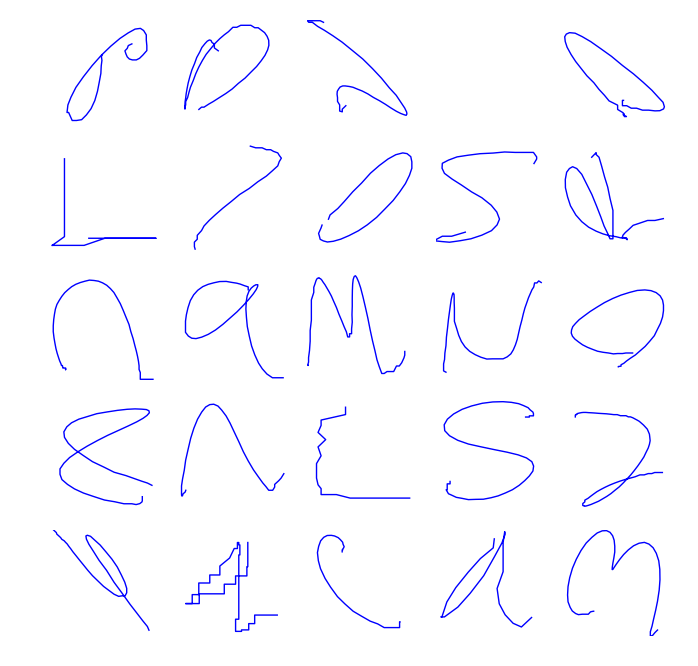

In [3]:
ujipen_path = 'UCI-Ujipen-Chars2/ujipenchars2.txt'

# Load and parse the data
num_stroke = 0
data = []
with open(ujipen_path, 'rb') as f:
    for line in f.readlines():
        line = line.strip() # remove extra space before and after the sentence
        if not line.startswith('//'): # Not a comment
            if line.startswith('NUMSTROKES'): # check the nb of strokes
                num_stroke = int(line[-1])
            elif line.startswith('POINTS') and num_stroke == 1: # only keep single stroke characters
                hash_idx = line.find('#')
                coord = map(int, line[hash_idx+2:].split())
                x = coord[::2]
                y = coord[1::2]
                data.append(np.array([x,y]))

#print(len(data))

# Choose randomly 25 characters and plot them
idx = np.random.choice(len(data), 25, replace=False)
data = [data[i] for i in idx]
plt.figure(figsize=(8,8))
for i,d in enumerate(data):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.plot(d[0], d[1][::-1]) # note that the y coordinates goes from 'up' to 'bottom'
plt.show()

## [HWRT Database of Handwritten symbols](www.martin-thoma.de/write-math/data/) <a id='hwrt'></a>

* Size: 151,160 (training data), 17,075 (test data)
* Short description: "on-line data of handwritten symbols such as all alphanumeric characters, arrows, greek characters and mathematical symbols like the integral symbol"
* Note: this dataset contains single and multiple strokes characters.

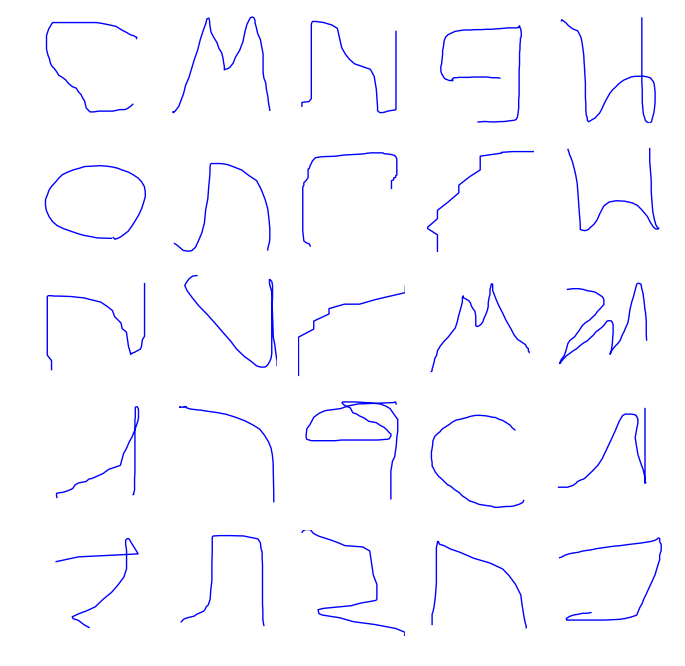

In [5]:
hwrt_path = 'HWRT/train-data.csv'
#hwrt_path = 'HWRT/test-data.csv'

# Read the csv file. WARNING: do not load the whole file!
# Header: symbol_id; user_id; data; user_agent
data = pd.read_csv(hwrt_path, sep=';', quotechar="'", index_col=False, skiprows=0, nrows=2000)
# transform the string '[[{},{}]]' into a list of list of dict
data.data = data.data.apply(literal_eval)

# Get a list of (x,y) for each data
xy = []
for i,ex in enumerate(data['data']):
    if len(ex) == 1: # single stroke
        x = [dic['x'] for dic in ex[0]]
        y = [dic['y'] for dic in ex[0]]
        xy.append([x,y])

# Choose randomly 25 characters and plot them
idx = np.random.choice(len(xy), 25, replace=False)
xy = [xy[i] for i in idx]
plt.figure(figsize=(8,8))
for i,d in enumerate(xy):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.plot(d[0], d[1][::-1])
plt.show()

## [ICDAR2013 - Handwriting Stroke Recovery from Offline Data (Kaggle)](https://www.kaggle.com/c/icdar2013-stroke-recovery-from-offline-data) <a id='kaggle'></a>

* Size: 1,081 (training: 605, test: 476)
* Short description: "the data consists of 1,081 (arabic) signatures of 200 writers"

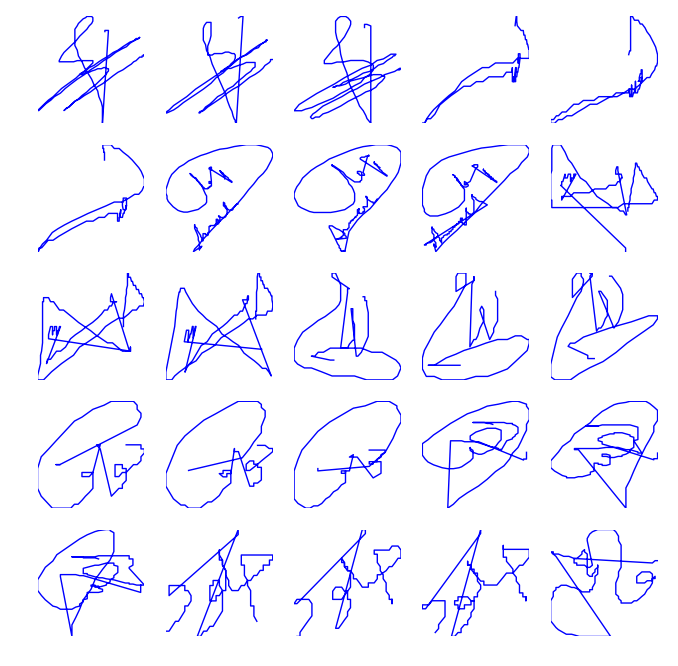

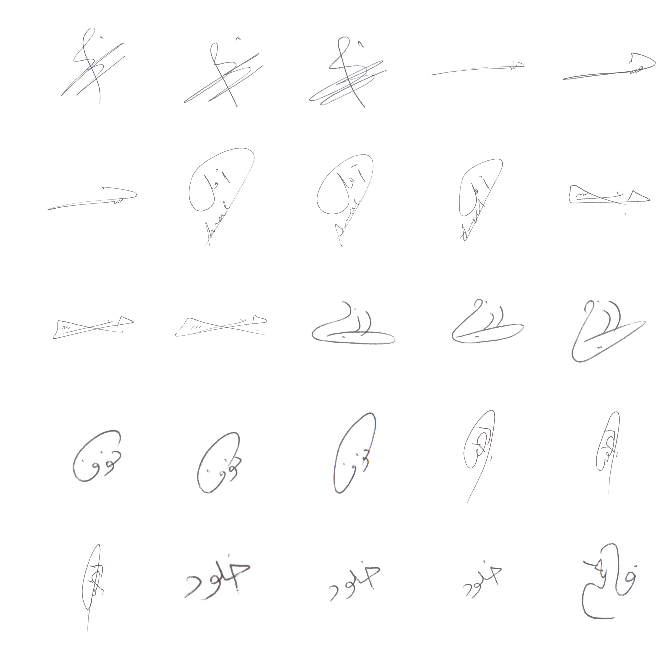

In [6]:
icdar_traj_path = 'ICDAR2013/train.csv' # normalized data (0,1)
#icdar_traj_path = 'ICDAR2013/unnormalized_data.csv' # unnormalized data
icdar_img_path = 'ICDAR2013/images-handwritten/'

# Read the csv file. WARNING: do not load the whole file!
# Header: train_id, signature_id, writer_id, occurence_id, time, x, y
data = pd.read_csv(icdar_traj_path, sep=',') #, skiprows=0, nrows=2000)
#print(data.dtypes)

# Get a list of (x,y) for each data
N = data['signature_id'].max()
xy = []
for i in range(N):
    d = data.loc[data['signature_id'] == i+1]
    xy.append(np.array([d['x'].values, d['y'].values]))

# Choose randomly 25 characters and plot them
idx = np.random.choice(len(xy), 25, replace=False)
idx = np.array(range(25))
xy = [xy[i] for i in idx]
plt.figure(figsize=(8,8))
for i,d in enumerate(xy):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.plot(d[0], 1.-d[1]) # note that we need to inverse the y
plt.show()

# Plot the corresponding images
imgs = [misc.imread(icdar_img_path+'{:04d}.jpg'.format(i+1)) for i in idx]
plt.figure(figsize=(8,8))
for i,img in enumerate(imgs):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

## [IAM Online Handwriting Database](www.fki.inf.unibe.ch/databases/iam-on-line-handwriting-database) <a id='IAMonline'></a>

* Size: 1,712 forms, 12,195 imgs/strokeset/sub-sentences/sequences.
* Short description: " The IAM On-Line Handwriting Database (IAM-OnDB) contains forms of handwritten English text acquired on a whiteboard." It contains the images of the various forms and the corresponding trajectories/strokes. 
* Note: You will need to register on the website in order to download the dataset. It is free!

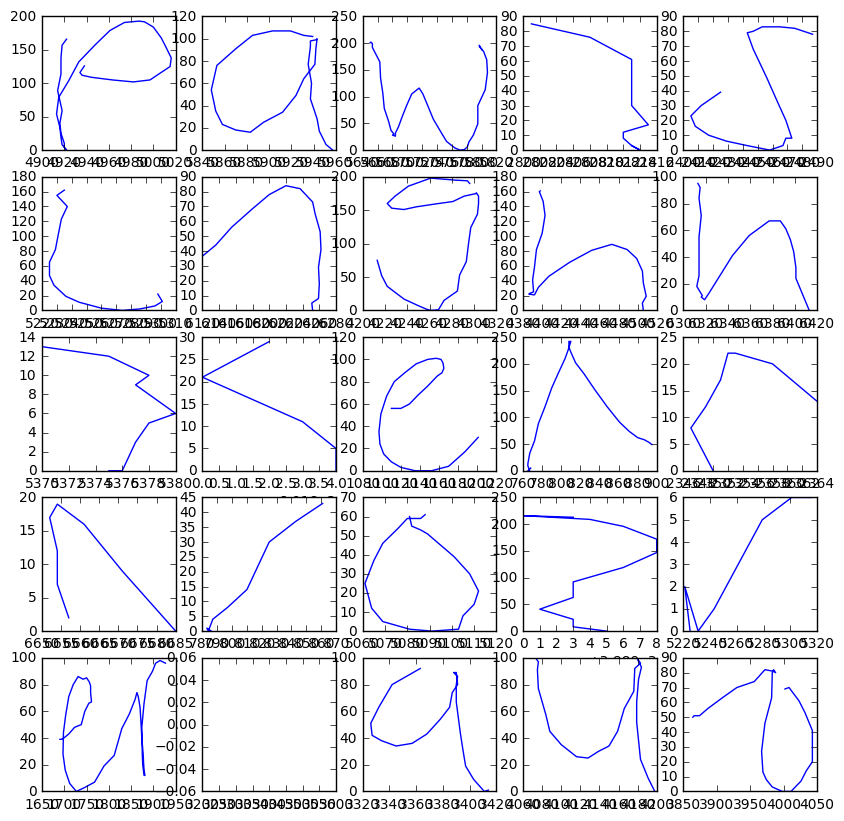

In [8]:
import xml.etree.ElementTree as ET
from glob import glob
import os

iam_imgs_dirpath = 'IAM-Online/lineImages/'
iam_strokes_dirpath = 'IAM-Online/lineStrokes/'
#iam_strokes_dirpath = 'IAM-Online/lineStrokes/a01/a01-000/a01-000u-01.xml'

# Get all the paths
trajs = sorted(glob(iam_strokes_dirpath+'*/*/*.xml'))[:1000] # take only the first 1000
imgs = sorted(glob(iam_imgs_dirpath+'*/*/*.tif'))[:1000]
N = len(trajs)

# Load all the xml files, and extract all the strokes
strokes = []
for i,traj in enumerate(trajs):
    tree = ET.parse(traj)
    # Get the data
    xy = []
    for stroke in tree.iter(tag='Stroke'):
        x = [int(point.attrib['x']) for point in stroke]
        y = [int(point.attrib['y']) for point in stroke]
        xy.append(np.array([x,y]))
    strokes.append(xy)


# Randomly choose a strokeset, and then randomly choose 25 strokes and plot them
idx = np.random.choice(N, 1)[0]
strokes = strokes[idx]
N_stroke = len(strokes)
size = N_stroke if N_stroke < 25 else 25
idx = np.random.choice(N_stroke, size, replace=False)
xy = [strokes[i] for i in idx]
plt.figure(figsize=(10,10))
for i,d in enumerate(xy):
    if i==25: break
    plt.subplot(5,5,i+1)
    plt.plot(d[0], d[1].max()-d[1])
plt.show()